In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190104/3D/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']

In [4]:
loc_list = [14, 15, 21, 22, 27, 28]

In [5]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                index_col=0,
                                                encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [6]:
def get_ratio_per_sum(base):
    for index in range(len(base.columns)):
        base.iloc[:, index] /= base.iloc[:, index].sum()
#     base = base.round(4)
    
    return base

In [7]:
times_list = [str(3600 * (i + 1)) for i in range(6)]

In [8]:
def get_model(trainX, y):
    model = LR()
    model.fit(trainX, y)
    
    return model

In [9]:
def interpolate_times(index):
    return times_list[:index+1]

In [10]:
pred = None

pred_array = {}
for _dir in dir_list:
    pred_array[_dir] = {}
    for _seed in seed_list:
        pred_array[_dir][_seed] = {}
        for _csv in csv_list:
            pred_array[_dir][_seed][_csv] = {}
            
            for index in range(len(times_list)-1):
                # seed123だけを学習し、他はテストとする
                df = csv_array[_dir][_seed][_csv].copy()
#                 df = get_ratio_per_sum(df)
                df = df.fillna(0)
                
                if _seed == '123':
                    model = get_model(df[interpolate_times(index)], df[times_list[index+1]])
                    pred = model.predict(df[interpolate_times(index)])
                    
                else:
                    df = df[interpolate_times(index+1)]
                    df['pred'] = pred
                    
                    columns = df.columns
                    df['diff'] = df[columns[-2]] / df[columns[-1]]
                    pred_array[_dir][_seed][_csv][times_list[index+1]] = df

In [11]:
def get_times_list(time):
    index = times_list.index(time)
    return times_list[:index+1]

In [12]:
def get_times_list_before(time):
    index = times_list.index(time)
    return times_list[:index]

In [19]:
people = 'people30000'
csv = 'census'
time = '21600'

In [20]:
x = {}
y = {}
for _seed in seed_list:
    df = csv_array[people][_seed][csv].copy()
    x[_seed] = df[get_times_list_before(time)]
    y[_seed] = df[time].values.reshape(-1, 1)

[[-0.36558885 -0.10259171 -0.58614945  0.6518658   1.14469228]]
0.9977565965703293


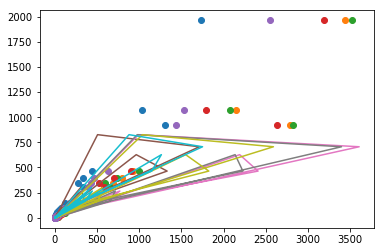

In [26]:
seed = '123'
X = x[seed]
Y = y[seed]
X_test = x['124']

model = LR()
model.fit(X, Y)
plt.plot(X, Y, 'o')
plt.plot(X_test, model.predict(X_test))
print(model.coef_)
print(model.score(X, Y))

In [81]:
import seaborn as sns
def create_regplot(X, Y, order=3):
    Px = np.arange(0, len(X), 1)
    p = sns.regplot(x=Px, y=Y, order=order, ci=75)

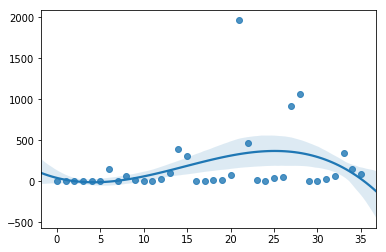

In [82]:
create_regplot(X, Y)

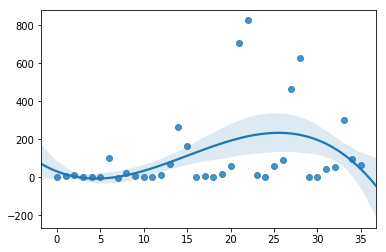

In [83]:
create_regplot(X_test, model.predict(X_test))

In [16]:
def standard_scaler(x):
    sc=preprocessing.StandardScaler()
    sc.fit(x)
    x=sc.transform(x)
    return x

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         0
        26.0       0.00      0.00      0.00         0
        30.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         1
        58.0       0.00    

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kessapassa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


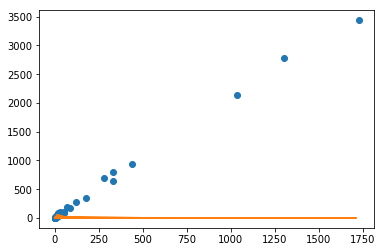

In [17]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

seed_train = '123'
seed_test = '124'

trainX = x[seed_train]
trainY = np.reshape(y[seed_train],(-1))
testX = x[seed_test]
testY = np.reshape(y[seed_test],(-1))

clf = svm.SVC()
clf.fit(trainX, trainY)
pred = clf.predict(testX)
clf.score(testX, testY)

plt.plot(trainX, trainY, 'o')
plt.plot(testX, pred)

print(classification_report(testY, pred))
print(accuracy_score(testY, pred))

0.6958553236868856


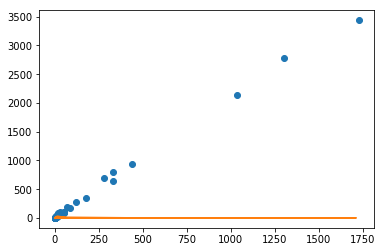

In [18]:
from sklearn.kernel_ridge import KernelRidge

seed = '123'
X = x[seed]
Y = y[seed]
X_test = x['124']

model = KernelRidge(alpha=1.0, kernel='rbf')
model.fit(X, Y)
plt.plot(X, Y, 'o')
plt.plot(X_test, model.predict(X_test))
print(model.score(X, Y))